<a href="https://colab.research.google.com/github/sonikatam/Stock-Predictor-/blob/main/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: Using Long Short Term Memory (LSTM) to predict closing stock prices of
#              corporations. This is a artificial recurrent neural network in deep learning
#              which has feedback connections. This project will use data of stock prices
#              from the past 60 days.

In [ ]:
#imports
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re


In [ ]:
#Get Stocks
df = pd.read_csv('AAPL.csv')
df #shows data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714724,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716953,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049522,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000
...,...,...,...,...,...,...,...
2000,2022-12-12,142.699997,144.500000,141.059998,144.490005,143.309357,70462700
2001,2022-12-13,149.500000,149.970001,144.240005,145.470001,144.281387,93886200
2002,2022-12-14,145.350006,146.660004,141.160004,143.210007,142.039841,82291200
2003,2022-12-15,141.110001,141.800003,136.029999,136.500000,135.384644,98931900


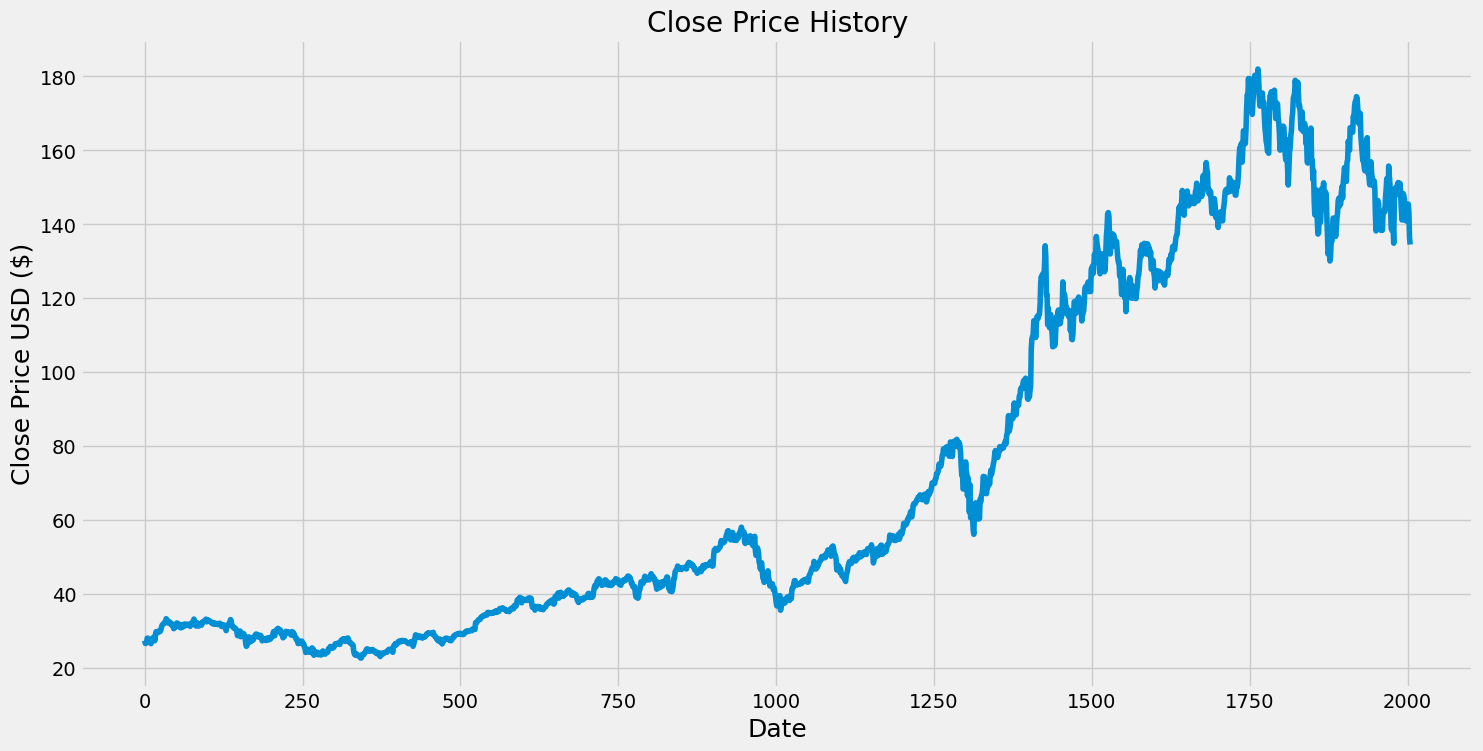

In [ ]:
#Visualize closing price data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#create a new datafram with only the 'Close colums"
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1604

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
#Create the training dataset
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.0301239 , 0.03459308, 0.0355026 ,
       0.03569077, 0.02948095, 0.03915634, 0.04478596, 0.04205741,
       0.04436255, 0.04439392, 0.04582092, 0.04641682, 0.044833  ,
       0.04607183, 0.04967853, 0.0541634 , 0.05664106, 0.05761331,
       0.05878941, 0.06018505, 0.05976164, 0.06140819, 0.06689667,
       0.06559512, 0.0602948 , 0.06285088, 0.05977735, 0.06076525,
       0.06118865, 0.05990277, 0.05656266, 0.0568606 , 0.05770739,
       0.0535832 , 0.05002352, 0.0534891 , 0.05214051, 0.05427317,
       0.05755058, 0.05979301, 0.05827192, 0.05576291, 0.05781716,
       0.05700174, 0.0518112 , 0.05315979, 0.05160735, 0.05649994])]
[0.05345774636243367]

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03

In [ ]:
#Convert the x_train and y_train to nump arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1544, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1544/1544 [==============================] - 58s 34ms/step - loss: 0.0012


In [ ]:
#Create the testing data set
#Create a new array containing scale values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets for x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(401, 60, 1)

In [ ]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 25ms/step


In [ ]:
#Evaluate model
#Get the root mean sqaured error also known as RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse #the value of 0 of the RMSE means the predictions were exact

10.088570875209438

<ipython-input-94-fd1f80dd5620>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


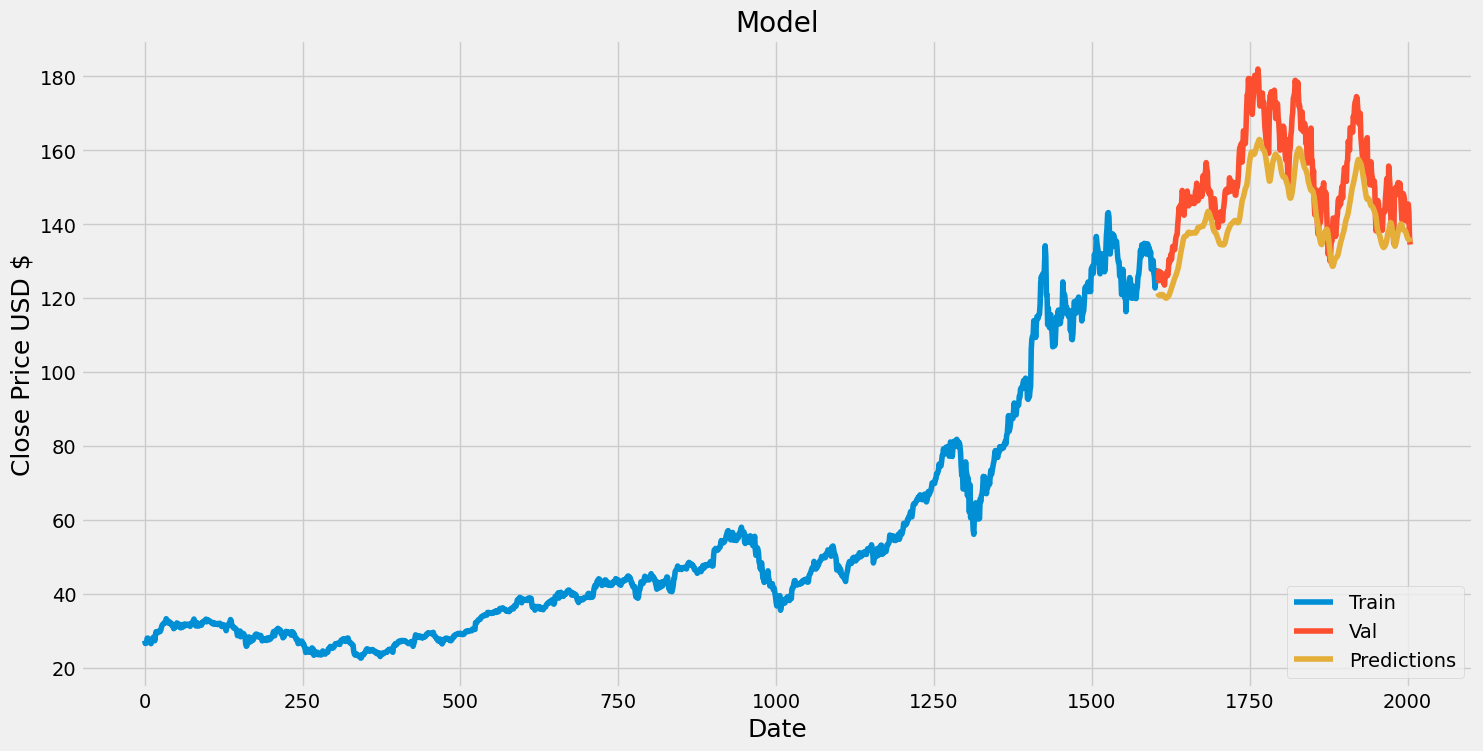

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
1604,124.849998,121.400497
1605,124.690002,121.112816
1606,127.309998,120.829994
1607,125.430000,120.790825
1608,127.099998,120.720657
...,...,...
2000,144.490005,136.197449
2001,145.470001,135.933334
2002,143.210007,135.909561
2003,136.500000,135.829086
